# Loding Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfx = pd.read_csv('weightedX.csv')
dfy = pd.read_csv('weightedY.csv')

In [3]:
X = dfx.values
Y = dfy.values

In [4]:
print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [5]:
# Normalise Data
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std 

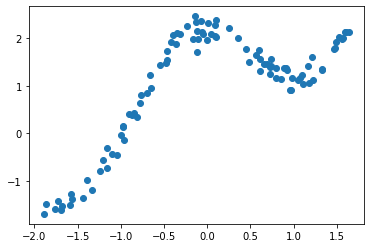

In [6]:
plt.scatter(X,Y)
plt.show()

# Finding Out W(mxm) Diagonal matrix 

In [7]:
np.mat(np.eye(5))
# When we have array a*b means elementWise Multiplication
# But if we have numpy matrices a*b means matrix multiplication

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [38]:
def getW(query_point,X,tau):
    m = X.shape[0]
    W = np.mat(np.eye(M))
    for i in range(m):
        W[i,i] = np.exp((np.dot(X[i]-query_point,(X[i]-query_point).T))/(-2*tau*tau))
    return W
        

In [39]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getW(-1,X,1)
print(W.shape)
print(W)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


# Make Predictions

In [44]:
def closedFormSolution(X,Y,query_point,tau):
    X_ = np.hstack((X,(np.ones((X.shape[0],1)))))
    W = getW(np.mat([query_point,1]),X_,tau)
    firstpart = np.dot(X_.T,np.dot(W,X_))
    secondpart = np.dot(X_.T,np.dot(W,Y))
    theta = np.dot(np.linalg.pinv(firstpart),secondpart)
    ans = np.dot((np.mat([query_point,1])),theta)
    return ans

In [45]:
closedFormSolution(X,Y,1.0,1.0)

matrix([[1.59417694]])

# Visualise predictions, Analyse Value of Tau

In [46]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        pred = closedFormSolution(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

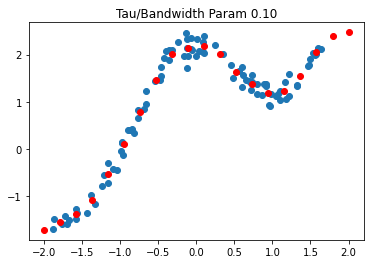

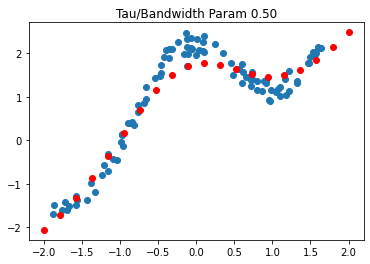

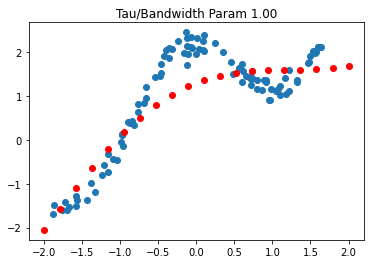

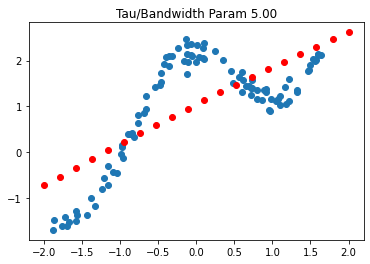

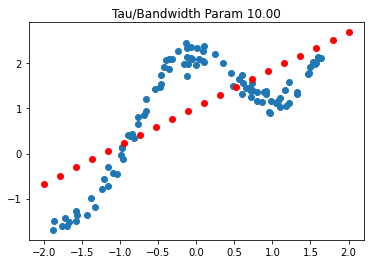

In [48]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)